In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import tensorflow as tf
import tensorflow.keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load Data

In [2]:
tweet_txt_raw = open('/content/us_train.text','r',encoding="utf8")
tweet_labels_raw = open('/content/us_train.labels','r',encoding="utf8")

tweet_text = []
tweet_labels = []

for sentence in tweet_txt_raw:
    sentence = sentence.rstrip()
    tweet_text.append(sentence)

for sentence in tweet_labels_raw:
    sentence = sentence.rstrip()
    sentence = int(sentence)
    tweet_labels.append(sentence)

df = pd.DataFrame()
df["Tweet"] = tweet_text
df["Label"] = tweet_labels

In [3]:
df.head()

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [4]:
print("Shape of the dataset : ", df.shape)

Shape of the dataset :  (50000, 2)


# Emoji Mapping

In [5]:
emoji_raw = open('/content/us_mapping.txt','r',encoding="utf8")

emoji = []
label = []
meaning = []
for sentence in emoji_raw:
    print(sentence)
    sentence = sentence.rstrip()
    label.append(sentence.split()[0])
    emoji.append(sentence.split()[1])
    meaning.append(sentence.split()[2:])

emoji_map = pd.DataFrame()
emoji_map['Label'] = label
emoji_map['Emoji'] = emoji
emoji_map['Meaning'] = meaning

0	❤️	 Red heart	

1	😍	 Smiling face with hearteyes	

2	😂	 Face with tears of joy	

3	💕	 Two hearts

4	🔥	 Fire

5	😊	 Smiling face with smiling eyes	

6	😎	 Smiling face with sunglasses	

7	✨	 Sparkles 	

8	💙	 Blue heart

9	😘	 Face blowing a kiss	

10	📷	 Camera	

11	🇺🇸	 United States	

12	☀️	 Sun

13	💜	 Purple heart 	

14	😉	 Winking face	

15	💯	 Hundred points	

16	😁	 Beaming face with smiling eyes	

17	🎄	Christmas tree	

18	📸	Camera with flash

19	😜	Winking face with tongue	



In [6]:
print(emoji_map)

   Label Emoji                               Meaning
0      0    ❤️                          [Red, heart]
1      1     😍      [Smiling, face, with, hearteyes]
2      2     😂          [Face, with, tears, of, joy]
3      3     💕                         [Two, hearts]
4      4     🔥                                [Fire]
5      5     😊  [Smiling, face, with, smiling, eyes]
6      6     😎     [Smiling, face, with, sunglasses]
7      7     ✨                            [Sparkles]
8      8     💙                         [Blue, heart]
9      9     😘              [Face, blowing, a, kiss]
10    10     📷                              [Camera]
11    11    🇺🇸                      [United, States]
12    12    ☀️                                 [Sun]
13    13     💜                       [Purple, heart]
14    14     😉                       [Winking, face]
15    15     💯                     [Hundred, points]
16    16     😁  [Beaming, face, with, smiling, eyes]
17    17     🎄                     [Christmas,

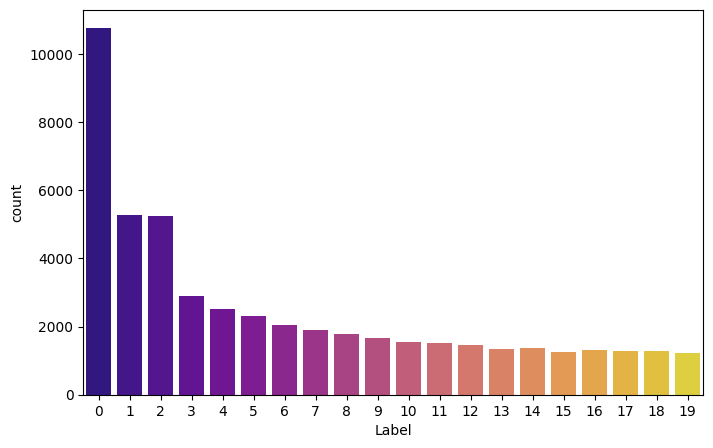

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Label'], palette="plasma")
plt.show()

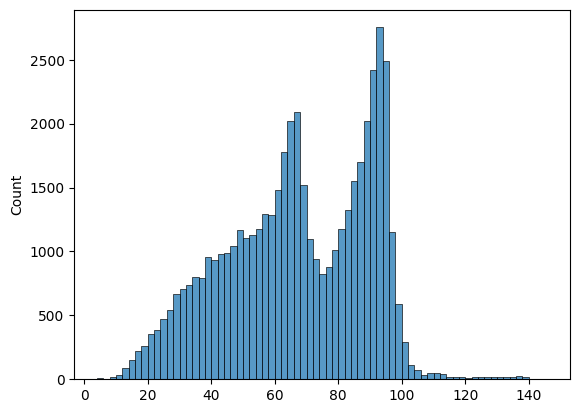

In [8]:
tweet_len = []
for sen in df['Tweet']:
  tweet_len.append(len(sen))

new_df = pd.DataFrame()
new_df['Tweet_Length'] = tweet_len

sns.histplot(tweet_len)
plt.show()

In [9]:
corr = df['Label'].corr(new_df['Tweet_Length'])
print(corr)

0.02414849426685132


In [10]:
print("Duplicated Rows : ", df.duplicated().sum())

Duplicated Rows :  116


In [11]:
df = df.drop_duplicates()

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.shape

(49884, 2)

In [14]:
def lowercase(tweet):
  tweet = str(tweet)
  return tweet.lower()

In [15]:
def remove_html_tags(tweet):
    tweet = str(tweet)
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', tweet)

In [16]:
def remove_url(tweet):
    tweet = str(tweet)
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', tweet)

In [17]:
def remove_punctuations(tweet):
    tweet = str(tweet)
    exclude = string.punctuation
    return tweet.translate(str.maketrans('', '', exclude))

In [18]:
def remove_mentions(tweet):
    return re.sub(r'@[A-Za-z0-9_]+', '', tweet)

In [19]:
def remove_stopwords(tweet):
    tweet = str(tweet)
    tweet_words = []

    for word in tweet.split():
        if word in stopwords.words('english'):
            tweet_words.append('')
        else:
            tweet_words.append(word)
    return ' '.join(tweet_words)

In [20]:
def remove_numbers(tweet):
    tweet = str(tweet)
    return re.sub(r'\d+', '', tweet)

In [21]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for w in word_tokenize(text):
        lemmatized_words.append(lemmatizer.lemmatize(w))
    return " ".join(lemmatized_words)

In [22]:
def preprocessing(data):
  df['Tweet'] = df['Tweet'].apply(lowercase)
  df['Tweet'] = df['Tweet'].apply(remove_html_tags)
  df['Tweet'] = df['Tweet'].apply(remove_url)
  df['Tweet'] = df['Tweet'].apply(remove_punctuations)
  df['Tweet'] = df['Tweet'].apply(remove_mentions)
  df['Tweet'] = df['Tweet'].apply(remove_stopwords)
  df['Tweet'] = df['Tweet'].apply(remove_numbers)
  df['Tweet'] = df['Tweet'].apply(lemmatize_text)

In [23]:
preprocessing(df)

In [24]:
df.head()

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam user yesterday kcon makeup using user fea...,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,never galaxy far far away,2


In [25]:
df['Label'].value_counts()

0     10728
1      5263
2      5237
3      2881
4      2513
5      2312
6      2043
7      1884
8      1791
9      1667
10     1541
11     1518
12     1460
14     1375
13     1346
16     1306
18     1284
17     1276
15     1246
19     1213
Name: Label, dtype: int64

# Sentiment Analysis

In [26]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [27]:
analyzer = SentimentIntensityAnalyzer()
sentiment_score = []
for tweet in df['Tweet']:
  sentiment = analyzer.polarity_scores(tweet)['compound']
  if sentiment >= 0.5:
    sentiment_score.append(1)
  elif sentiment <= -0.5:
    sentiment_score.append(-1)
  else:
    sentiment_score.append(0)

print(sentiment_score)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, -1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, -1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 1, -1, -1, 1, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, -

In [28]:
new_df = pd.DataFrame()
new_df['Tweet'] = df['Tweet']
new_df['Sentiment_Score'] = sentiment_score
new_df['Label'] = df['Label']
print(new_df.shape)

(49884, 3)


In [29]:
new_df.sample(5)

,Tweet,Sentiment_Score,Label
21734,let repeat spring break user gopro mission bea...,0,12
31996,reunited gal pal disney spring,0,3
46582,repost user thank great class p thanks user for…,1,16
37211,balloon amp crown u queen amp king cliff edge,0,9
38807,realize weird stas weight room,0,2


In [30]:
corr = new_df['Label'].corr(new_df['Sentiment_Score'])

In [31]:
print(corr)

-0.06495911462472476


Correlation between sentiment of the tweet and label is very low so we will discard it as our feature.

In [32]:
X = df['Tweet'].values
y = df['Label'].values

In [33]:
X.shape

(49884,)

# Over-sampling data

In [34]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X = X.reshape(X.shape[0],1)
X, y = os.fit_resample(X, y)
X = X.reshape(X.shape[0],)
print(X.shape, y.shape)

(214560,) (214560,)


# Tokenization

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [36]:
for i in range(10):
  print("Tweet:", X[i])
  print("Tokenized Text:", sequences[i])

Tweet: little throwback favourite person water wall
Tokenized Text: [30, 370, 1731, 362, 589, 670]
Tweet: glam user yesterday kcon makeup using user featherette…
Tokenized Text: [3057, 1, 210, 21557, 618, 1536, 1, 21558]
Tweet: democracy plaza wake stunning outcome decision nbc news
Tokenized Text: [4395, 567, 992, 1268, 7157, 2757, 5413, 1436]
Tweet: amp vilo walt disney magic kingdom
Tokenized Text: [7, 47094, 529, 82, 180, 303]
Tweet: never galaxy far far away
Tokenized Text: [91, 2561, 708, 708, 488]
Tweet: dinner fla tonight panseared salmon couscous veggie salad yum dinner florida salmon…
Tokenized Text: [155, 12231, 46, 47095, 2328, 47096, 3183, 1590, 1906, 155, 50, 47097]
Tweet: fav senior last game congrats beating west west salem…
Tokenized Text: [461, 406, 25, 108, 485, 4897, 150, 150, 11042]
Tweet: got go formal best friend phi mu jsu
Tokenized Text: [18, 42, 1060, 20, 26, 943, 3822, 18373]
Tweet: cause miss little homies throwback cousinlove indiana university
Tokenized Te

In [37]:
max_length = max(len(seq) for seq in sequences)
print("Length of the longest tweet : ", max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

Length of the longest tweet :  23


In [38]:
print("Number of unique words in vocalbulary : ", len(tokenizer.word_index))

Number of unique words in vocalbulary :  59964


In [39]:
print("Padded Sequence : ", padded_sequences[0])

Padded Sequence :  [  30  370 1731  362  589  670    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)
print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (171648, 23)
Training y Dim  (171648,)
Test X Dim  (42912, 23)
Test y Dim  (42912,)


# LSTMs Model

In [70]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Embedding, BatchNormalization

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=20,input_length=X_train.shape[1]))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 23, 20)            1199300   
                                                                 
 lstm_15 (LSTM)              (None, 23, 80)            32320     
                                                                 
 dropout_15 (Dropout)        (None, 23, 80)            0         
                                                                 
 lstm_16 (LSTM)              (None, 40)                19360     
                                                                 
 dropout_16 (Dropout)        (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
Total params: 1251800 (4.78 MB)
Trainable params: 1251

In [71]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=1,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [74]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=callback)

Epoch 1/20
5364/5364 [==============================] - 243s 45ms/step - loss: 2.3199 - accuracy: 0.2818 - val_loss: 1.6497 - val_accuracy: 0.4995
Epoch 2/20
5364/5364 [==============================] - 232s 43ms/step - loss: 1.3264 - accuracy: 0.6208 - val_loss: 1.0941 - val_accuracy: 0.6896
Epoch 3/20
5364/5364 [==============================] - 240s 45ms/step - loss: 0.9073 - accuracy: 0.7491 - val_loss: 0.9032 - val_accuracy: 0.7380
Epoch 4/20
5364/5364 [==============================] - 241s 45ms/step - loss: 0.7052 - accuracy: 0.8057 - val_loss: 0.7566 - val_accuracy: 0.7841
Epoch 5/20
5364/5364 [==============================] - 234s 44ms/step - loss: 0.5786 - accuracy: 0.8422 - val_loss: 0.6782 - val_accuracy: 0.8136
Epoch 6/20
5364/5364 [==============================] - 242s 45ms/step - loss: 0.4780 - accuracy: 0.8697 - val_loss: 0.6250 - val_accuracy: 0.8354
Epoch 7/20
5364/5364 [==============================] - 245s 46ms/step - loss: 0.4045 - accuracy: 0.8900 - val_loss: 0

# Model Evaluation

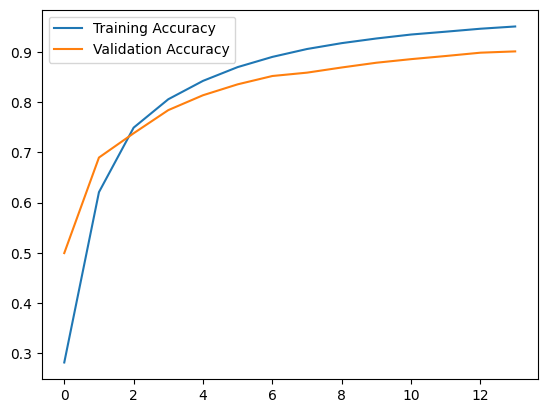

In [85]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

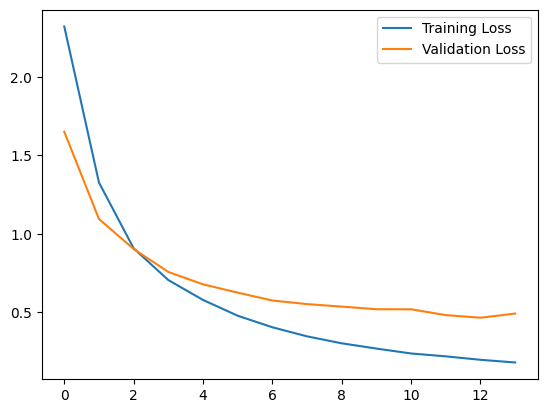

In [86]:
plt.plot(history.history['loss'],  label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [88]:
y_pred = model.predict(X_test)

1341/1341 [==============================] - 16s 11ms/step


In [92]:
y_pred.shape

(42912, 20)

In [98]:
y_predicted = []
for i in range(y_pred.shape[0]):
  y_predicted.append(np.argmax(y_pred[i]))

print(len(y_predicted))

42912


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.56      0.33      0.42      2100
           1       0.76      0.68      0.72      2090
           2       0.86      0.78      0.82      2178
           3       0.82      0.86      0.84      2158
           4       0.91      0.95      0.93      2072
           5       0.92      0.90      0.91      2141
           6       0.87      0.93      0.90      2117
           7       0.89      0.93      0.91      2171
           8       0.84      0.95      0.89      2156
           9       0.90      0.95      0.92      2198
          10       0.96      0.98      0.97      2112
          11       0.90      0.98      0.93      2167
          12       0.98      0.92      0.95      2066
          13       0.95      0.98      0.96      2134
          14       0.95      0.97      0.96      2146
          15       0.95      0.98      0.97      2259
          16       0.95      0.97      0.96      2197
          17       0.97    

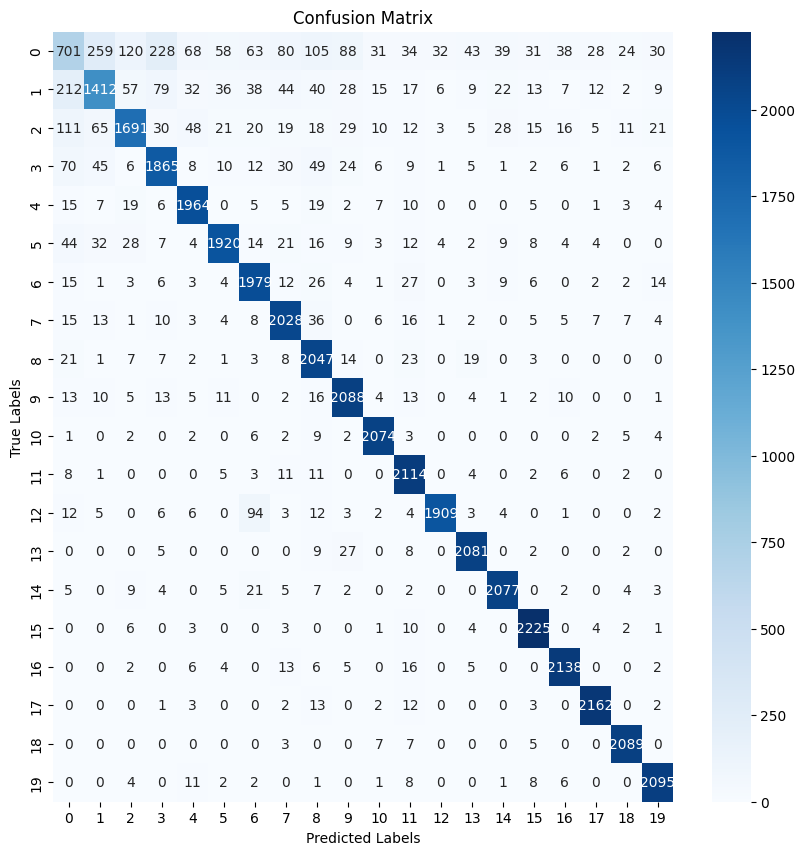

In [100]:
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in range(20)], yticklabels=[i for i in range(20)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Bidirectional LSTMs Model

In [101]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=20,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(units = 80, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units = 40)))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 23, 20)            1199300   
                                                                 
 bidirectional (Bidirection  (None, 23, 160)           64640     
 al)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 23, 160)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 80)                64320     
 onal)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 80)                0         
                                                                 
 dense_8 (Dense)             (None, 20)               

In [102]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [103]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=callback)

Epoch 1/20
5364/5364 [==============================] - 355s 65ms/step - loss: 2.0290 - accuracy: 0.3866 - val_loss: 1.2704 - val_accuracy: 0.6298
Epoch 2/20
5364/5364 [==============================] - 364s 68ms/step - loss: 0.9786 - accuracy: 0.7215 - val_loss: 0.8335 - val_accuracy: 0.7644
Epoch 3/20
5364/5364 [==============================] - 369s 69ms/step - loss: 0.6433 - accuracy: 0.8189 - val_loss: 0.6585 - val_accuracy: 0.8178
Epoch 4/20
5364/5364 [==============================] - 390s 73ms/step - loss: 0.4727 - accuracy: 0.8673 - val_loss: 0.5441 - val_accuracy: 0.8486
Epoch 5/20
5364/5364 [==============================] - 369s 69ms/step - loss: 0.3686 - accuracy: 0.8973 - val_loss: 0.4940 - val_accuracy: 0.8662
Epoch 6/20
5364/5364 [==============================] - 369s 69ms/step - loss: 0.2986 - accuracy: 0.9166 - val_loss: 0.4777 - val_accuracy: 0.8775
Epoch 7/20
5364/5364 [==============================] - 391s 73ms/step - loss: 0.2452 - accuracy: 0.9315 - val_loss: 0

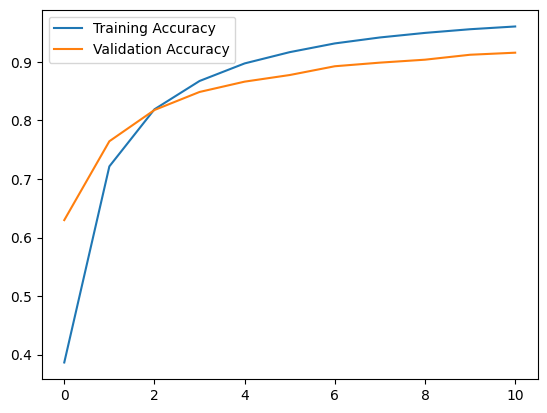

In [104]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

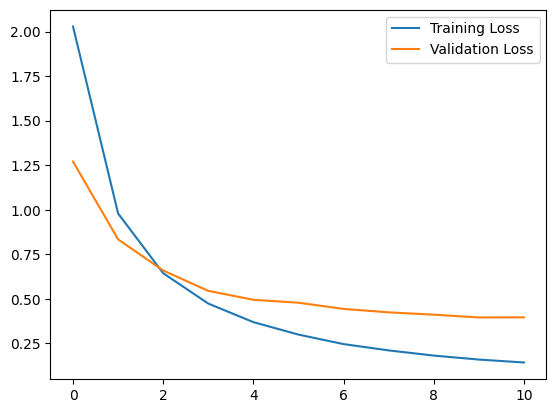

In [105]:
plt.plot(history.history['loss'],  label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [106]:
y_pred = model.predict(X_test)

1341/1341 [==============================] - 37s 26ms/step


In [107]:
y_pred.shape

(42912, 20)

In [108]:
y_predicted = []
for i in range(y_pred.shape[0]):
  y_predicted.append(np.argmax(y_pred[i]))

print(len(y_predicted))

42912


In [109]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.61      0.37      0.46      2100
           1       0.78      0.70      0.74      2090
           2       0.83      0.78      0.80      2178
           3       0.87      0.88      0.88      2158
           4       0.95      0.95      0.95      2072
           5       0.88      0.93      0.90      2141
           6       0.92      0.94      0.93      2117
           7       0.91      0.96      0.94      2171
           8       0.92      0.96      0.94      2156
           9       0.92      0.97      0.94      2198
          10       0.98      0.98      0.98      2112
          11       0.95      0.98      0.96      2167
          12       0.95      0.98      0.97      2066
          13       0.91      0.99      0.95      2134
          14       0.95      0.99      0.97      2146
          15       0.97      0.99      0.98      2259
          16       0.97      0.99      0.98      2197
          17       0.96    

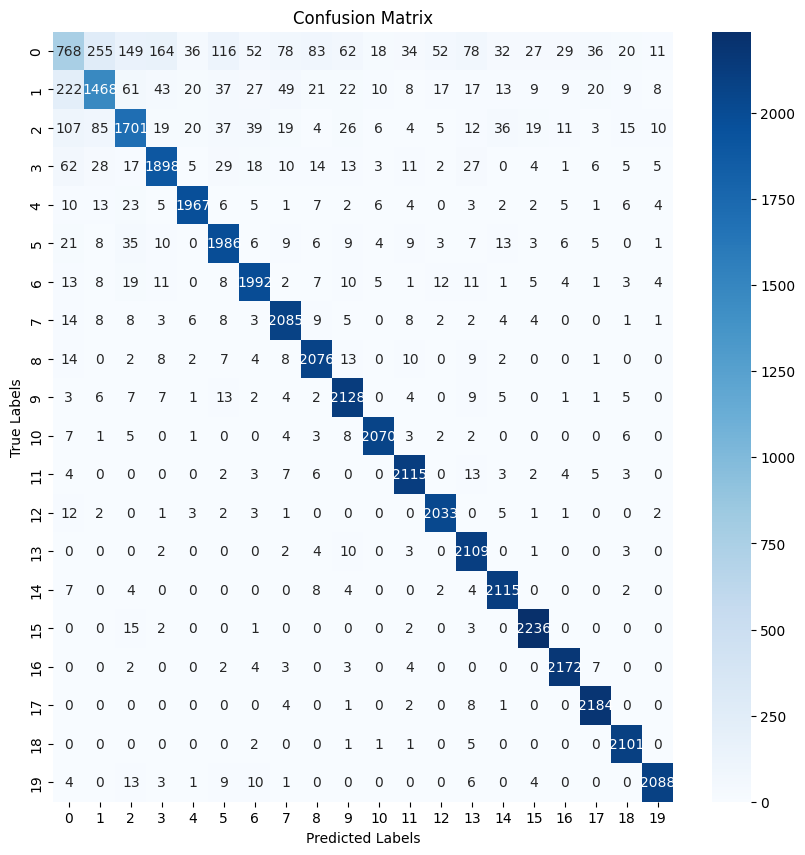

In [110]:
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in range(20)], yticklabels=[i for i in range(20)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()